# 1、 绘制数据表中total profit的线图，并要求具有如下属性：

## ①    趋势线为虚线，颜色为红色

## ②    在右下角显示图例

## ③    图题为“图一：全年公司售卖数据”

## ④    X轴标签为Month Number

## ⑤    Y轴标签为Sold units number

## ⑥    标识点为红圈圆点

## ⑦    线条宽度为3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("lab01_company_sales_.csv")

In [3]:
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


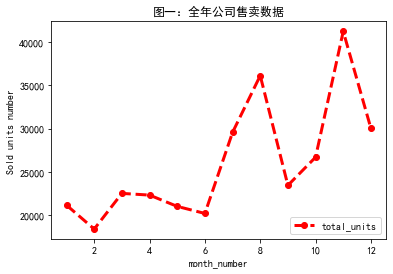

In [4]:
plt.plot(df['month_number'],df['total_units'],linestyle='--',color='red',marker='o',linewidth=3,label='total_units')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title("图一：全年公司售卖数据")
plt.xlabel('month_number')
plt.ylabel('Sold units number')
plt.legend(loc=4)

# 2、 绘制每个月toothpaste售卖量的散点图，并要求具有如下属性：

## ①    图例在绘图的左上角

## ②    标识点为蓝色叉叉

## ③    图题为“图二：牙膏售卖量散点图”

## ④    X轴标签为Month Number

## ⑤    Y轴标签为Number of Units Sold

## ⑥    背景加网格，网格形式为”-“

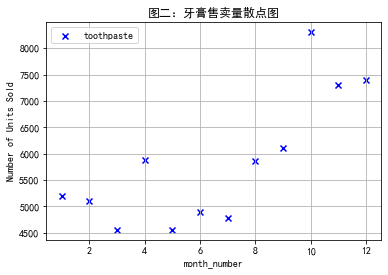

In [5]:
plt.scatter(df['month_number'],df['toothpaste'],color='blue',marker='x',label='toothpaste')
plt.title("图二：牙膏售卖量散点图")
plt.xlabel('month_number')
plt.ylabel('Number of Units Sold')
plt.grid(True)
plt.legend(loc=2)

# 3、 绘制face cream售卖量的条形图，并具有如下特征

## ①    图例在绘图的左上角

## ②    图题为“图三：洗面奶和面霜售卖量对比条形图”

## ③    X轴标签为Month Number

## ④    Y轴标签为Sales Units in Number

## ⑤    背景加网格，网格形式为”-“

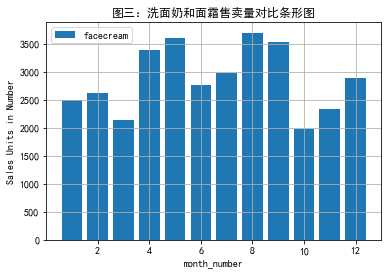

In [6]:
plt.bar(df['month_number'],df['facecream'],label='facecream')
plt.title("图三：洗面奶和面霜售卖量对比条形图")
plt.xlabel('month_number')
plt.ylabel('Sales Units in Number')
plt.grid(True)
plt.legend(loc=2)

# 4、 计算去年每种商品的总售卖量，并绘制各商品售卖额的饼图

## ①    图例在绘图的右下角

## ②    显示每种商品售卖额所占百分比数值

## ③    图题为“图四：各商品售卖额占比图”

In [7]:
list =[]
for i in range(1,7):
    list.append(df.iloc[:,i].sum())

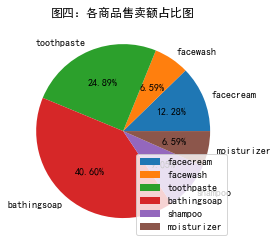

In [8]:
label = ['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']
plt.pie(x=list,labels=label,autopct='%.2f%%')
plt.title('图四：各商品售卖额占比图')
plt.legend(loc=4)

# 5、 绘制个月售卖额的直方图，并添加分布密度曲线

## ①    图例在绘图的左上

## ②    图题为“图五：售卖额条形分布图”

## ③    X轴标签为Profit Range in dollar

## ④    Y轴标签为Frequency Counts

In [10]:
res_freq = stats.relfreq(df['total_profit'], numbins=11)
res_freqcdf_value = np.cumsum(res_freq.frequency)
cdf_value = np.cumsum(res_freq.frequency)
x = res_freq.lowerlimit + np.linspace(0, res_freq.binsize * res_freq.frequency.size, res_freq.frequency.size)

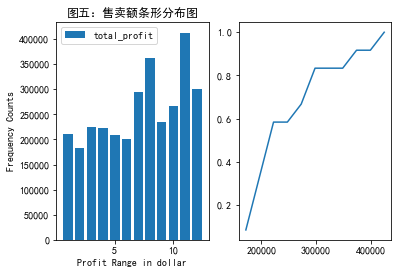

In [11]:
plt.subplot(1,2,1)
plt.bar(df['month_number'],df['total_profit'],label='total_profit')
plt.title("图五：售卖额条形分布图")
plt.xlabel('Profit Range in dollar')
plt.ylabel('Frequency Counts')
plt.legend(loc=2)
plt.subplot(1,2,2)
plt.plot(x,cdf_value)

## 6、 绘制toothpaste、face cream和face wash售卖量的箱线图

<AxesSubplot:>

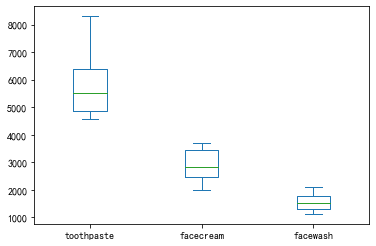

In [12]:
# list = [df['toothpaste'],df['facecream'],df['facewash']]
# list
list = pd.DataFrame({'toothpaste':df['toothpaste'],'facecream':df['facecream'],'facewash':df['facewash']})
list.plot.box()

## 7、 根据如下数据绘制该同学各门课程成绩的雷达图

### 科目：物理、化学、生物、数学、英语

### 成绩：60、40、68、94、77

In [13]:
labels=np.array(["物理","化学","生物","数学","英语"])
stats=[60, 40, 68, 94, 77]
# 画图数据准备，角度、状态值
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)#数据准备
stats=np.concatenate((stats,[stats[0]]))#数值聚合
angles=np.concatenate((angles,[angles[0]]))#角度聚合
labels=np.concatenate((labels,[labels[0]]))#标签聚合

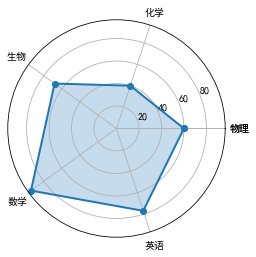

In [14]:
# 用 Matplotlib 画蜘蛛图
fig = plt.figure()#新建画布
ax = fig.add_subplot(111, polar=True)#创建极坐标
ax.plot(angles, stats, 'o-', linewidth=2)#绘制空心圆直线
ax.fill(angles, stats, alpha=0.25)#填充数据
ax.set_thetagrids(angles * 180/np.pi, labels)#绘制网格线
plt.show()#显示图表